Nama : satrio Mukti Prayoga <br>
NIM  : 211351085 <br>
Kelas: Malam B

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satriomuktiprayoga","key":"e0fff387357eb1ac9969841cb3ef8b77"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 4.27MB/s]


In [6]:
!mkdir heart-failure-prediction
!unzip heart-failure-prediction.zip -d heart-failure-prediction
!ls heart-failure-prediction

Archive:  heart-failure-prediction.zip
  inflating: heart-failure-prediction/heart.csv  
heart.csv


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [8]:
df = pd.read_csv('heart-failure-prediction/heart.csv')

In [9]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.shape

(918, 12)

In [12]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dataset yang saya gunakan tidak ada data yang null.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [14]:
oldpeak_less_than_zero = df[df['Oldpeak'] <= 0]
chol_zero = df[df['Cholesterol'] < 80]
rbp_zero = df[df['RestingBP'] <= 0]
print("Jumlah data dengan Oldpeak < 0 :", len(oldpeak_less_than_zero), "data")
print("Jumlah data dengan Cholesterol =< 0 :", len(chol_zero), "data")
print("Jumlah data dengan RestingBP =< 0 :", len(rbp_zero), "data")

Jumlah data dengan Oldpeak < 0 : 381 data
Jumlah data dengan Cholesterol =< 0 : 172 data
Jumlah data dengan RestingBP =< 0 : 1 data


pada oldpeak terdapat nilai < 0 atau minus, jadi saya akan drop, dan juga disini kolesterol dan restingbp(Resting Blood Pressure) ada yang memiliki nilai 0, dimana kolesterol dan restingbp manusia tidak akan pernah 0, maka akan saya hapus baris data yang memiliki nilai 0 pada kolesterol dan restingbp.

In [15]:
df = df[df.Cholesterol != 0]
df = df[df.RestingBP != 0]
df = df[df['Oldpeak'] >= 0]

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,745.0,52.906040,9.489625,28.0,46.0,54.0,59.0,77.0
RestingBP,745.0,133.036242,17.290451,92.0,120.0,130.0,140.0,200.0
Cholesterol,745.0,244.747651,59.113689,85.0,208.0,237.0,275.0,603.0
FastingBS,745.0,0.167785,0.373927,0.0,0.0,0.0,0.0,1.0
MaxHR,745.0,140.209396,24.536108,69.0,122.0,140.0,160.0,202.0
Oldpeak,745.0,0.902953,1.072953,0.0,0.0,0.5,1.5,6.2
HeartDisease,745.0,0.477852,0.499845,0.0,0.0,0.0,1.0,1.0


In [17]:
df.shape

(745, 12)

In [18]:
categorical = df.select_dtypes('object').columns
print(f'Categorical Columns: {df[categorical].columns}\n')

df[categorical].nunique()

Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')



Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

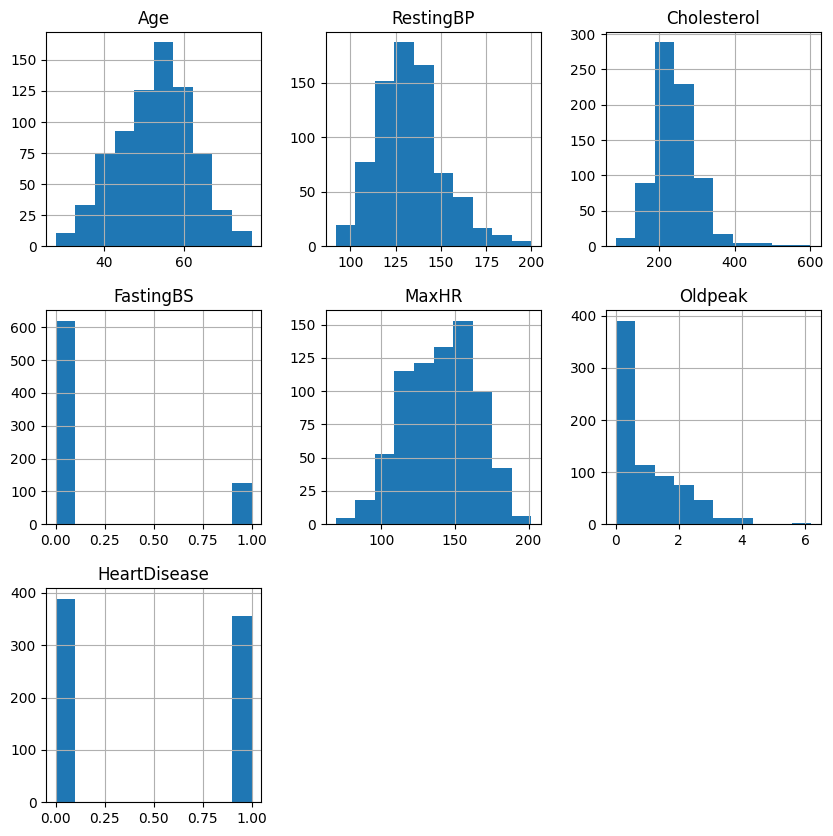

In [19]:
df.hist(figsize=(10,10))

<Axes: xlabel='Sex', ylabel='Age'>

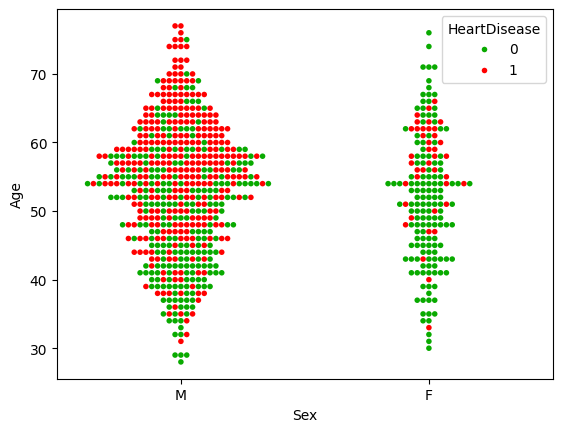

In [20]:
colors = ['#09AA00', '#ff0000']

sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=df, s=4, palette=colors)

In [21]:
object_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for columns in object_columns:
  print(df[columns].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [22]:
le = LabelEncoder()
for columns in object_columns:
  print("before : ", df[columns].unique())
  df[columns] = le.fit_transform(df[columns])
  print("after : ", df[columns].unique())


before :  ['M' 'F']
after :  [1 0]
before :  ['ATA' 'NAP' 'ASY' 'TA']
after :  [1 2 0 3]
before :  ['Normal' 'ST' 'LVH']
after :  [1 2 0]
before :  ['N' 'Y']
after :  [0 1]
before :  ['Up' 'Flat' 'Down']
after :  [2 1 0]


<Axes: >

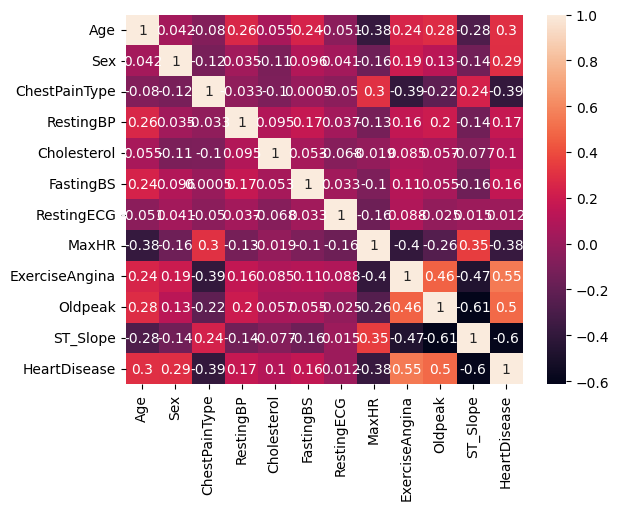

In [23]:
sns.heatmap(df.corr(), annot=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             745 non-null    int64  
 1   Sex             745 non-null    int64  
 2   ChestPainType   745 non-null    int64  
 3   RestingBP       745 non-null    int64  
 4   Cholesterol     745 non-null    int64  
 5   FastingBS       745 non-null    int64  
 6   RestingECG      745 non-null    int64  
 7   MaxHR           745 non-null    int64  
 8   ExerciseAngina  745 non-null    int64  
 9   Oldpeak         745 non-null    float64
 10  ST_Slope        745 non-null    int64  
 11  HeartDisease    745 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 75.7 KB


In [25]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [50]:
X = df.drop(columns = ['HeartDisease'])
y = df['HeartDisease']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [52]:
model = Sequential([
    Dense(16, activation='relu', input_dim=(11)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                192       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 409 (1.60 KB)
Trainable params: 409 (1.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


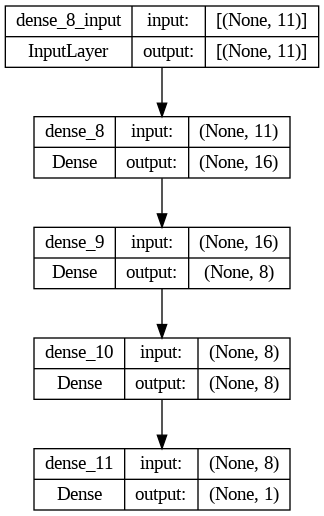

In [54]:
plot_model(model, show_shapes = True)

In [55]:
model.compile(
    optimizer='Adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
    )

In [56]:
history = model.fit(X_train, y_train, epochs=100, validation_split=.25)

Epoch 1/100
16/16 [==============================] - 2s 25ms/step - loss: 9.7715 - accuracy: 0.5040 - val_loss: 3.1118 - val_accuracy: 0.4524
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 2.3823 - accuracy: 0.4582 - val_loss: 1.4038 - val_accuracy: 0.5536
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 1.5739 - accuracy: 0.4841 - val_loss: 1.3972 - val_accuracy: 0.4762
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 1.3511 - accuracy: 0.5139 - val_loss: 1.0524 - val_accuracy: 0.5357
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1.1234 - accuracy: 0.5100 - val_loss: 0.8658 - val_accuracy: 0.6012
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.9622 - accuracy: 0.5697 - val_loss: 0.7005 - val_accuracy: 0.6250
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9125 - accuracy: 0.6036 - val_loss: 0.6242 - val_accuracy: 0.6905
Epoch 8/100


In [57]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8800


[0.4646558165550232, 0.8799999952316284]

In [58]:
prediction = model.predict([[49,	0,	2,	160,	500,	0,	1,	156,	0,	1.0,	1]]) # gagal
print(prediction)

if prediction > 0.5 :
  print("gagal jantung")
else :
  print("tidak gagal")

1/1 [==============================] - 0s 100ms/step
[[0.9914964]]
gagal jantung


In [59]:
prediction = model.predict([[40, 1,	1,	140,	289,	0,	1,	172,	0,	0.0, 2]]) # tidak gagal
print(prediction)

if prediction > 0.5 :
  print("gagal jantung")
else :
  print("tidak gagal")

1/1 [==============================] - 0s 56ms/step
[[0.17006701]]
tidak gagal


3/3 [==============================] - 0s 4ms/step


<Axes: >

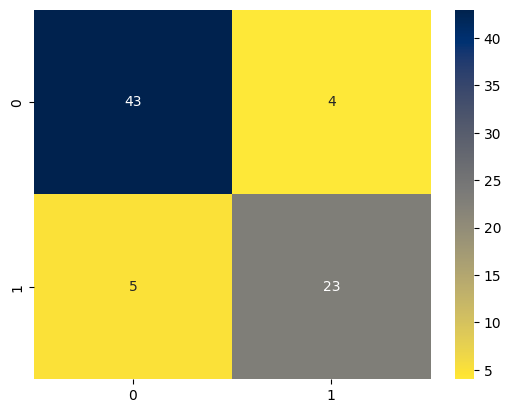

In [60]:
y_pred = model.predict(X_test)
cfm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cfm, annot=True, fmt='.0f',cmap='cividis_r')

In [62]:
model.save('./heart.h5')
model = tf.keras.models.load_model('./heart.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./heart.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4164